In [3]:
# KMeans clustering is simple and easy to understand but its simplicity leads to practical challenges

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import numpy as np

In [5]:
# If we have simple blobs of data, kmeans can quickly label those clusters
# in a way that closely matches what we may do by eye

In [6]:
# Generate data
from sklearn.datasets._samples_generator import make_blobs
x, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
x = x[:, ::-1] # flip axes for better plotting

c:\Users\Family\DS_PRACTICE\ML_MODELS\venv_mlmodels\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


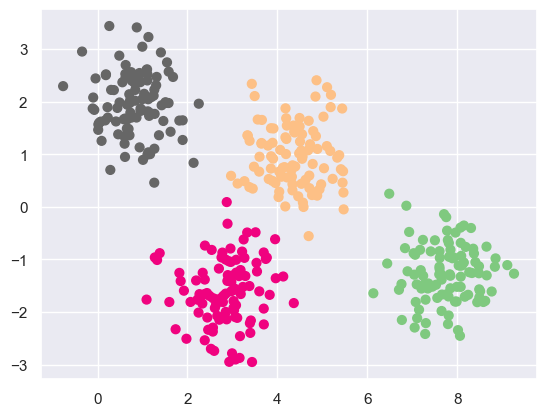

In [7]:
# plot the data with kmeans labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(x).predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='Accent')

In [8]:
# Let's visualize the cluster model

In [9]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [10]:
def plot_kmeans(kmeans, x, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(x)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='Accent', zorder=2)

    # plot the represntaion of kmeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(x[labels == i], [center]).max() 
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

c:\Users\Family\DS_PRACTICE\ML_MODELS\venv_mlmodels\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


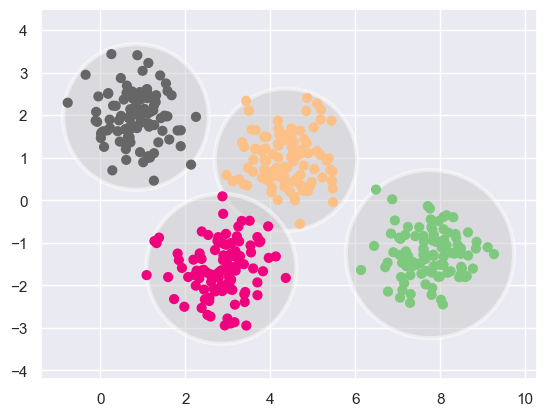

In [11]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, x)

In [12]:
# An important observation for k means is that these cluster models 
# must be circular. If we take the same data and transform it
# the cluster segments become muddled

c:\Users\Family\DS_PRACTICE\ML_MODELS\venv_mlmodels\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


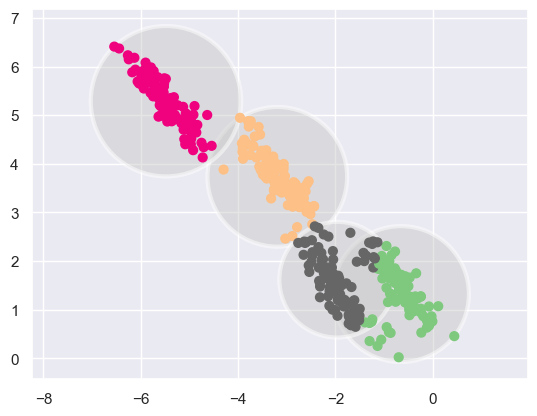

In [13]:
rng = np.random.RandomState(13)
x_stretched = np.dot(x, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, x_stretched)

In [14]:
# fig shows poor performance of kmeans for noncircular clusters
# kmeans is not fit for such kind of data and tries to force fit data into 4 circles

In [15]:
# GENERALIZING E-M : GAUSSIAN MIXTURE MODELS

In [17]:
from sklearn.mixture import GaussianMixture

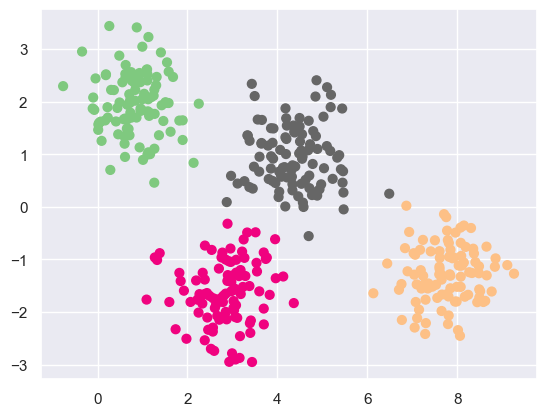

In [18]:
gmm = GaussianMixture(n_components=4).fit(x)
labels = gmm.predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='Accent')

In [19]:
probs = gmm.predict_proba(x)
print(probs[:5].round(3))

[[0.    0.469 0.    0.531]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]]


In [20]:
# We can generalize this uncertainity by making the size of each point proportional to the certainity of its prediction

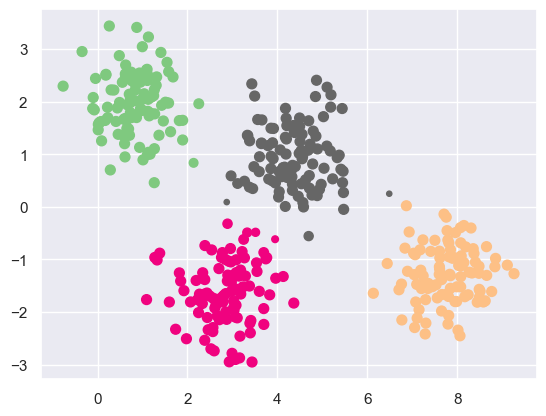

In [21]:
size = 50*probs.max(1) ** 2
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='Accent', s=size)

In [22]:
# Lets create a function that will help us visualize the locations and shapes
# of the GMM clusters by drawing ellipses based on GMM

In [23]:
from matplotlib.patches import Ellipse

In [25]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    # Draw an ellipse with a given position and covariance
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2,2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1,0], U[0, 0]))
        width, height = 2*np.sqrt(s)
    else:
        angle = 0
        width, height = 2*np.sqrt(covariance)

    # Draw the ellipsse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig*height, angle, **kwargs))

In [29]:
def plot_gmm(gmm, x, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(x).predict(x)
    if label:
        ax.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='Accent', zorder=2)
    else:
        ax.scatter(x[:, 0], x[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2/gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w*w_factor)

In [30]:
# We can now take a look at what the 4 component GMM gives us for our initial data

C:\Users\Family\AppData\Local\Temp\ipykernel_26092\863248933.py:16: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig*height, angle, **kwargs))


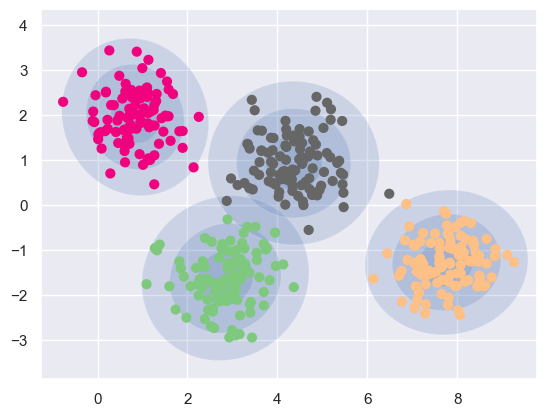

In [31]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, x)

In [32]:
# Similarly we can use the gmm approach to fit our stretched dataset
# allowing for a full covariance

In [33]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)

C:\Users\Family\AppData\Local\Temp\ipykernel_26092\863248933.py:16: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig*height, angle, **kwargs))


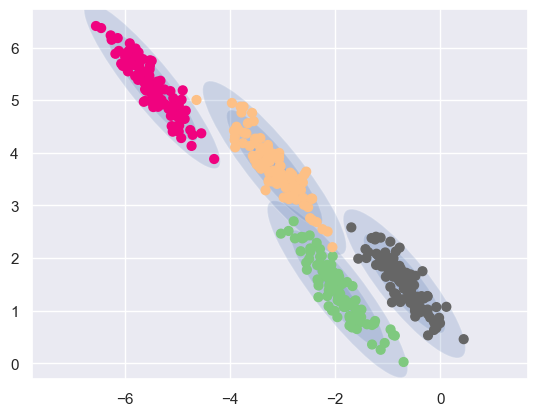

In [34]:
plot_gmm(gmm, x_stretched)

In [35]:
# Representation of 4 component GMM in the presence of non-circular clusters

In [36]:
# GMM as density estimation

In [37]:
from sklearn.datasets import make_moons

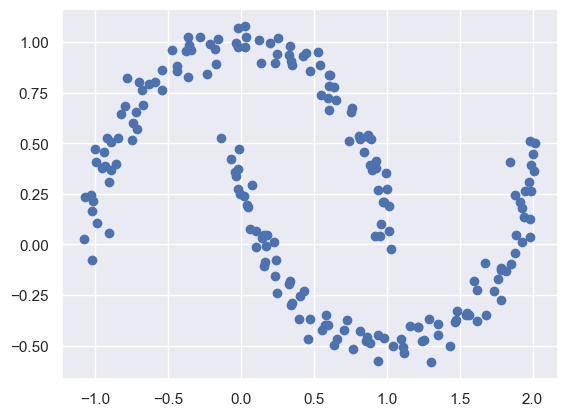

In [38]:
xmoon, ymoon = make_moons(200, noise=0.05, random_state=0)
plt.scatter(xmoon[:, 0], xmoon[:, 1])

C:\Users\Family\AppData\Local\Temp\ipykernel_26092\863248933.py:16: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig*height, angle, **kwargs))


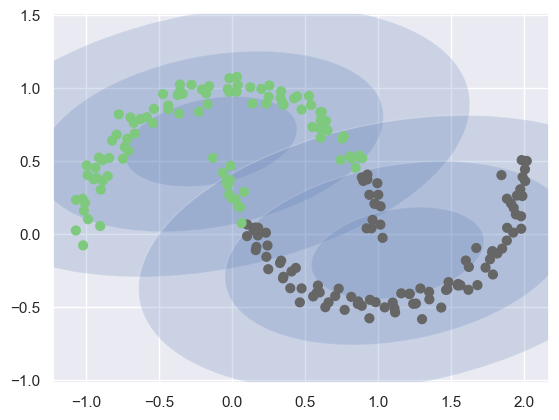

In [39]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, xmoon)

In [40]:
# If we use many more components and ignore the cluster labels, we find a fit that is much 
# closer to the input data

C:\Users\Family\AppData\Local\Temp\ipykernel_26092\863248933.py:16: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig*height, angle, **kwargs))


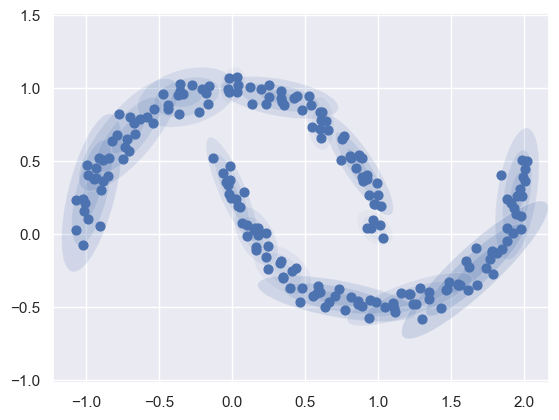

In [42]:
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, xmoon, label=False)

In [43]:
# fig above shows using many gmm clusters to model the distribution of points

In [44]:
# here the mixture of 16 gaussians serves not to find separated clusters of data
# but rather to model the overall distribution of the input data

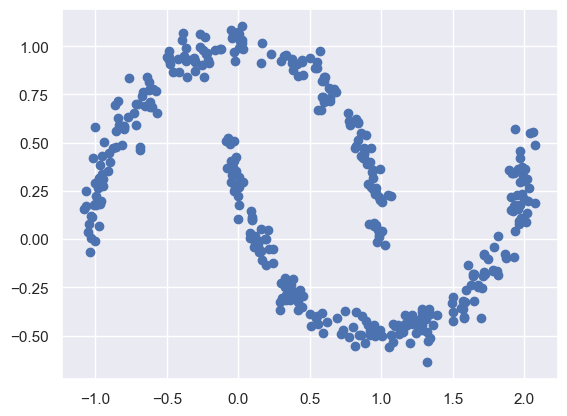

In [47]:
xnew, _ = gmm16.sample(400)
plt.scatter(xnew[:, 0], xnew[:, 1])

In [48]:
# GMM is convinient as a flexible means of modeling an arbitrary multidimenional distribution of data

In [49]:
# A generative model is inherently a probability distribution of the dataset
# and so we can simply evaluate the likelihood of the data under the model
# using cross validation to avoid overfitting

In [50]:
# Another means of correcting for overfitting is to adjust the model likelihoods using some
# analytic criterion such as the Akaike information criteria (AIC)
# or Baysian information criteria (BIC)
# Sklearn's gmm estimator actually includes built-in methods that compute both of these
# and so it is very easy to operate on this approach

In [51]:
# Let's look AIC and BIC as a fucntion as the number of GMM components for our moon dataset

In [53]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(xmoon) for n in n_components]

Text(0.5, 0, 'n_components')

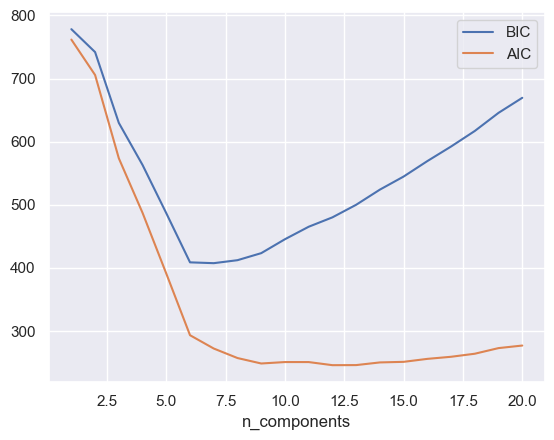

In [54]:
plt.plot(n_components, [m.bic(xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [55]:
# The optimum number of clusters is the value that minimizes the AIC and BIC depending on
# which approximation we wish to use

In [56]:
# The AIC tells us that our choice of 16 components was probably too many
# around 8-12 components would have been a good choice

In [57]:
# Notice that choice of number of components measures how well GMM works as a density estimator
# not how well it works as a clustring algorithm

In [58]:
# EXAMPLE : GMM FOR GENERATING NEW DATA

In [59]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [60]:
# Now lets plot the first 100 of these to recall what we're looking at

In [61]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)

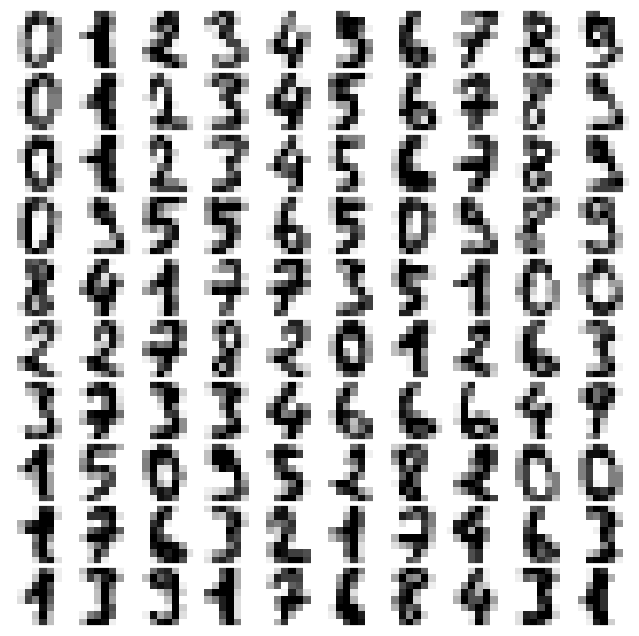

In [62]:
plot_digits(digits.data)

In [63]:
# We have nearly 1800 digits in 64 dimensions and we can build a GMM on top of these to generate
# more, GMMs can have difficulty converging in such  a high dimensional space

In [64]:
# Here we will use a straighforward PCA, asking it to preserve 99% of the variance in the data

In [65]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

In [66]:
# The result is 41 dimensions, a reduction of nearly 1/3 with almost no information loss

In [67]:
# Let's use AIC to get a gauge for the number of GMM components we should use

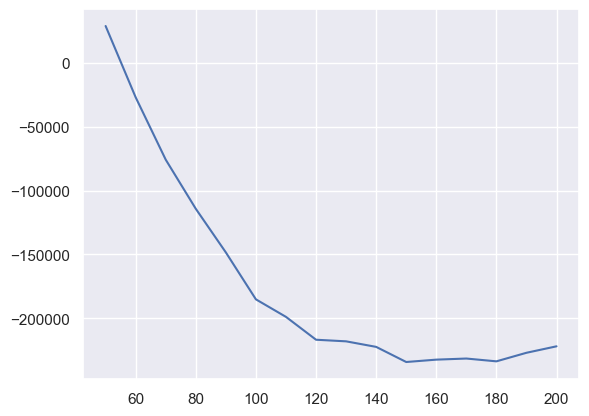

In [68]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0) for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics)

In [69]:
# It appears that around 110 components minimizes the AIC, we will use this model

In [70]:
# Let's quickly fit this to data and confirm it has converged
gmm = GaussianMixture(110, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [71]:
# Now we can draw samples of 100 new points within this 41d projected spcae, using the GMM as the generative model

In [74]:
data_new, _ = gmm.sample(100)
data_new.shape

(100, 41)

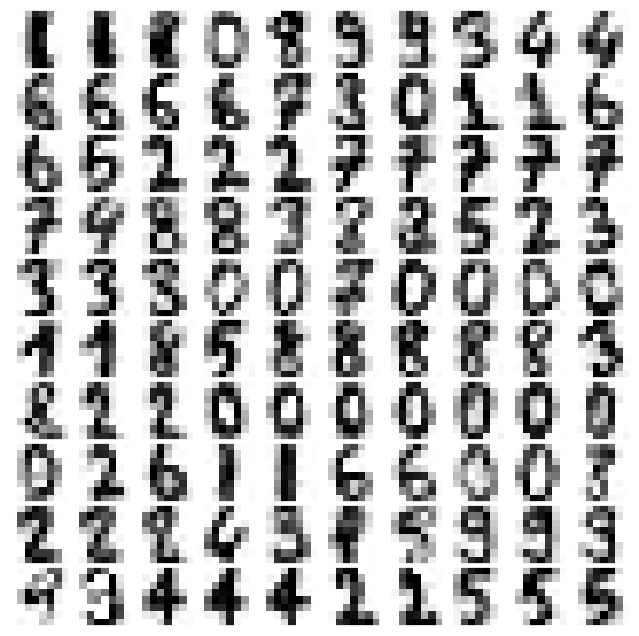

In [75]:
# Finally we can use the inverse transform of the PCA object to construct the new digits
digits_new = pca.inverse_transform(data_new)
plot_digits(digits_new)